C:\Users\saul7\AppData\Local\Temp\ipykernel_6116\4274649079.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  glacier_df = pd.read_csv('glacier.csv')


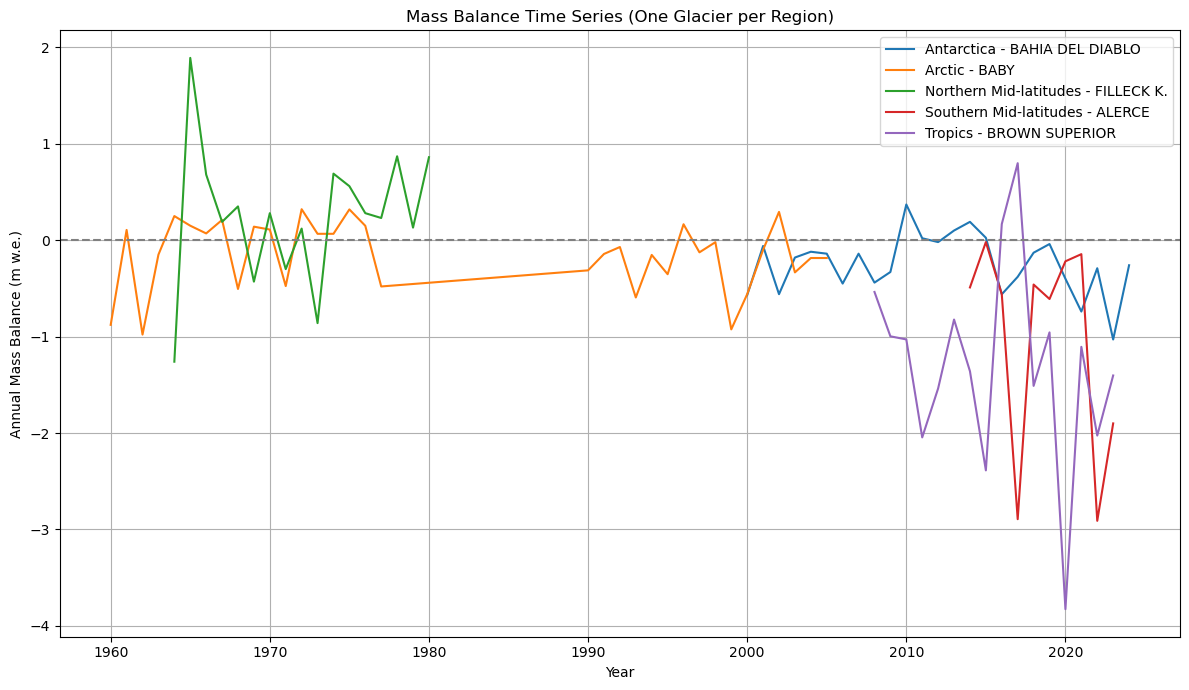

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and merge
glacier_df = pd.read_csv('glacier.csv')
mass_balance_df = pd.read_csv('mass_balance.csv')
glacier_df = glacier_df.rename(columns={'id': 'glacier_id'})
merged_df = pd.merge(glacier_df, mass_balance_df, on='glacier_id')

# remove rows missing needed data
merged_df = merged_df.dropna(subset=['latitude', 'longitude', 'annual_balance', 'year'])
#logic to make the different regions
def classify_region(lat):
    if lat > 60:
        return 'Arctic'
    elif lat > 0:
        return 'Northern Mid-latitudes'
    elif lat > -30:
        return 'Tropics'
    elif lat > -60:
        return 'Southern Mid-latitudes'
    else:
        return 'Antarctica'

merged_df['region'] = merged_df['latitude'].apply(classify_region)

# 1 glacier per region with ≥10 years of data
glaciers_by_region = []
for region, group in merged_df.groupby('region'):
    candidates = group.groupby('glacier_id').filter(lambda g: g['year'].nunique() >= 10)
    if not candidates.empty:
        glacier_id = candidates['glacier_id'].iloc[0]
        glacier_name = candidates[candidates['glacier_id'] == glacier_id]['glacier_name'].iloc[0]
        glacier_data = candidates[candidates['glacier_id'] == glacier_id]
        glaciers_by_region.append((region, glacier_name, glacier_data))

# Plot
plt.figure(figsize=(12, 7))
for region, name, data in glaciers_by_region:
    data = data.sort_values('year')
    label = f"{region} - {name}"
    plt.plot(data['year'], data['annual_balance'], label=label)

plt.title('Mass Balance Time Series (One Glacier per Region)')
plt.xlabel('Year')
plt.ylabel('Annual Mass Balance (m w.e.)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

What is Annual Mass Balance?
    Mass balance refers to the net gain or loss of ice on a glacier in a given year.
______________________________________________________________________________________________
It’s measured in meters water equivalent (m w.e.), which means how much the glacier gained or lost in terms of water volume.
Positive values (above 0): The glacier gained ice that year (more snow accumulation than melt).

Negative values (below 0): The glacier lost ice (more melting than snow accumulation).
______________________________________________________________________________________________
The dashed horizontal line at 0 separates gain from loss:

    Lines mostly below 0: Glacier is generally shrinking.

    Lines mostly above 0: Glacier is generally growing (less common).

